# Table of Contents

* [1 Introduction](#1)
* [2 Prerequisite](#2)
* [3 Encoding 1](#3)
    * [3.1 Binary features](#3.1)
    * [3.2 Nominal features](#3.2)
    * [3.3 Ordinal features](#3.3)
    * [3.4 Model and accuracy](#3.4)

# 1 Introduction <a class="anchor" id="1"></a>

## Categorical Feature Encoding Challenge

Playground prediction Competition from [Kaggle](https://www.kaggle.com/c/cat-in-the-dat). 

### Competition Description

Is there a cat in your dat?

A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:
* binary features
* low- and high-cardinality nominal features
* low- and high-cardinality ordinal features
* (potentially) cyclical features

This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. 

### Evaluation

Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

### Goal and Data

In this competition, you will be predicting the probability [0, 1] of a binary target column.

[Data](https://www.kaggle.com/c/cat-in-the-dat/data)

The data contains binary features (bin_\*), nominal features (nom_\*), ordinal features (ord_\*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

Since the purpose of this competition is to explore various encoding strategies, the data has been simplified in that (1) there are no missing values, and (2) <s>the test set does not contain any unseen feature values</s> ([See this](https://www.kaggle.com/c/cat-in-the-dat/discussion/105537)). 



# 2 Prerequisite <a class="anchor" id="2"></a>

Loading required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [3]:
train_initial = pd.read_csv('data/train.csv')
test_initial = pd.read_csv('data/test.csv')

# 3 Encoding 1 <a class="anchor" id="3"></a>

In [4]:
train = train_initial.copy()

In [5]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [6]:
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

The number of unique elements in the columns

In [7]:
train.nunique()

id        300000
bin_0          2
bin_1          2
bin_2          2
bin_3          2
bin_4          2
nom_0          3
nom_1          6
nom_2          6
nom_3          6
nom_4          4
nom_5        222
nom_6        522
nom_7       1220
nom_8       2215
nom_9      11981
ord_0          3
ord_1          5
ord_2          6
ord_3         15
ord_4         26
ord_5        192
day            7
month         12
target         2
dtype: int64

## 3.1 Binary features <a class="anchor" id="3.1"></a>
bin_3 and bin_4 are binary but use T/F and Y/N as values, so they need to be mapped to 1/0

In [8]:
train = train.replace({'bin_3': {'T': 1, 'F': 0},'bin_4': {'Y': 1, 'N': 0}})

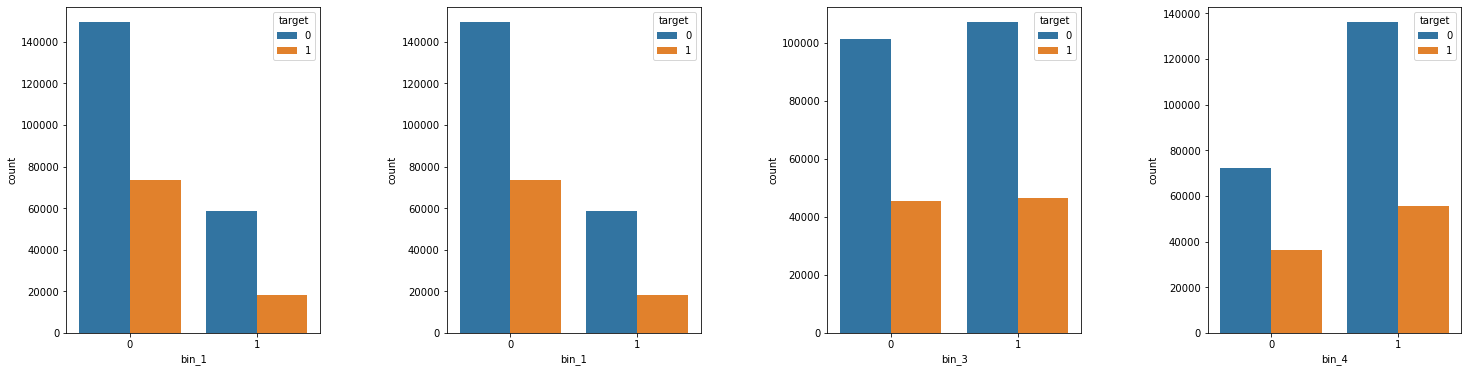

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(25, 6))
#train['bin_1'].plot(kind='bar', stacked=True,ax=ax[0])
sns.countplot(x='bin_1', hue='target', data=train, ax=ax[0])
sns.countplot(x='bin_1', hue='target', data=train, ax=ax[1])
sns.countplot(x='bin_3', hue='target', data=train, ax=ax[2])
sns.countplot(x='bin_4', hue='target', data=train, ax=ax[3])
plt.subplots_adjust(wspace=0.5)

## 3.2 Nominal features <a class="anchor" id="3.2"></a>
Looks like columns nom_5 to nom_9 have too many unique values. One-hot encoding that is used for nominal variales generally does not perform well if the categorical variable takes on a large number of values (i.e., you generally won't use it for variables taking more than 15 different values). So I would drop these columns. Moreover, the data looks like hashes, see below.

In [10]:
train[['nom_5','nom_6','nom_7','nom_8','nom_9']].head()

,nom_5,nom_6,nom_7,nom_8,nom_9
0,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51
1,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21
2,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0
3,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71
4,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7


In [11]:
train = train.drop(columns=['nom_5','nom_6','nom_7','nom_8','nom_9'])

The rest (nom_0-nom_4) are should be encoded. The one-hot encoding is recommended when working with tree-based models, however Dummy Variable Encoding is required for regression models that have a bias term (e.g. linear). I'm planning to start with simple logistic regression, so I use Dummy Variable Encoding

In [12]:
def one_hot_encode(df,columns):
    dummies = pd.get_dummies(df[columns],drop_first=True)
    df = df.drop(columns=columns)
    return pd.concat([df,dummies],axis=1)

In [13]:
nom_cols = ['nom_0','nom_1','nom_2','nom_3','nom_4']
train = one_hot_encode(train,nom_cols)
train.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'ord_0', 'ord_1',
       'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month', 'target',
       'nom_0_Green', 'nom_0_Red', 'nom_1_Polygon', 'nom_1_Square',
       'nom_1_Star', 'nom_1_Trapezoid', 'nom_1_Triangle', 'nom_2_Cat',
       'nom_2_Dog', 'nom_2_Hamster', 'nom_2_Lion', 'nom_2_Snake',
       'nom_3_China', 'nom_3_Costa Rica', 'nom_3_Finland', 'nom_3_India',
       'nom_3_Russia', 'nom_4_Oboe', 'nom_4_Piano', 'nom_4_Theremin'],
      dtype='object')

## 3.3 Ordinal features <a class="anchor" id="3.3"></a>
Let's first see what are the values of ordinal features.

In [14]:
ord_cols = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']

In [15]:
for col in ord_cols:
    print(train[col].unique())

[2 1 3]
['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB

Column 'ord_0' is ok, however, the rest should be encoded with Label Encoding. Let's encode ord_1 and ord_2 using replace.

In [16]:
ord_1 = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2 = ['Freezing', 'Cold', 'Hot', 'Warm', 'Boiling Hot', 'Lava Hot']

label_encoder_1 = {k : v for (k,v) in zip(ord_1,range(len(ord_1)))}
label_encoder_2 = {k : v for (k,v) in zip(ord_2,range(len(ord_2)))}

train = train.replace({'ord_1': label_encoder_1, 'ord_2': label_encoder_2})

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in ['ord_3', 'ord_4', 'ord_5']:
    train[col] = label_encoder.fit_transform(train[col])

Looks like all variables are now numeric, see below.

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   id                300000 non-null  int64
 1   bin_0             300000 non-null  int64
 2   bin_1             300000 non-null  int64
 3   bin_2             300000 non-null  int64
 4   bin_3             300000 non-null  int64
 5   bin_4             300000 non-null  int64
 6   ord_0             300000 non-null  int64
 7   ord_1             300000 non-null  int64
 8   ord_2             300000 non-null  int64
 9   ord_3             300000 non-null  int32
 10  ord_4             300000 non-null  int32
 11  ord_5             300000 non-null  int32
 12  day               300000 non-null  int64
 13  month             300000 non-null  int64
 14  target            300000 non-null  int64
 15  nom_0_Green       300000 non-null  uint8
 16  nom_0_Red         300000 non-null  uint8
 17  nom_1_Poly

## 3.4 Model and accuracy <a class="anchor" id="3.4"></a>
I'll try simple logistic regression

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def logistic(X,y,folds):
    lr = LogisticRegression()
    print('Accuracy : ', cross_val_score(lr, X, y, cv=folds, scoring='accuracy'))
    y_pred = cross_val_predict(lr, X, y, cv=folds)
    print('precision_score : ', precision_score(y, y_pred))
    print('recall_score : ', recall_score(y, y_pred))
    print('roc_auc_score : ', roc_auc_score(y, y_pred))

In [58]:
X = train.drop(['target'],axis=1)
y = train['target']

In [59]:
logistic(X,y,2)

Accuracy :  [0.51444667 0.69412   ]
precision_score :  0.3489717007565144
recall_score :  0.3393160716620897
roc_auc_score :  0.5301816724740845


In [60]:
logistic(X,y,3)

Accuracy :  [0.50073 0.69412 0.69412]
precision_score :  0.34761161804800406
recall_score :  0.24036659256353254
roc_auc_score :  0.5207864580789578


In [61]:
logistic(X,y,4)

Accuracy :  [0.49004 0.69412 0.69412 0.69412]
precision_score :  0.34484855856951707
recall_score :  0.18536681051392703
roc_auc_score :  0.5150887530354455
